In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import glob

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Preprocessing
- Eerste en/of laatste frames weghalen
- Data plotten en outliers eruithalen

In [3]:
def get_rows_for_file(file):
    data = np.load(file)
    nb_frames, nb_points, nb_values = data.shape
    res = np.empty((nb_frames, nb_points * nb_values + 1 ))
    res[:, :-1] = data.reshape((nb_frames, nb_points * nb_values))

    parts = file.split('-')
    action_idx = int(parts[1])
    res[:, -1] = action_idx

    return res

In [4]:
Xy = np.vstack([get_rows_for_file(filename) for filename in glob.glob('actions/*group-[1-7]*.npy')])
Xy.shape


(63000, 55)

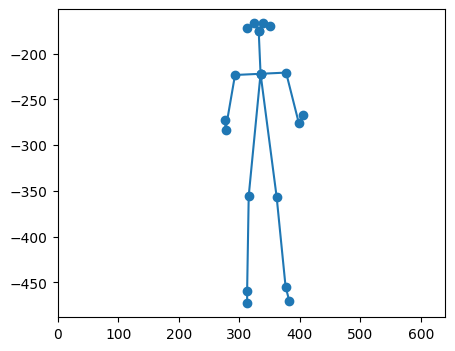

In [5]:
def plot_frame(filename='actions/action-6-group-4-rec-1.npy',frame_idx=0):
    action = np.load(filename)
    
    legs = [ 10, 9 , 8 ,1,11,12,13]
    arms = [ 4,3,2,1,5,6,7]
    face = [16,14,0,15,17]
    neck = [ 0,1]
    
    plt.figure(figsize=(5,4))
    for parts in [legs,arms,face,neck]:
        plt.plot(action[frame_idx,parts,0], -action[frame_idx,parts,1], 'o-', color='tab:blue')
    plt.xlim((0,640))
plot_frame()

In [6]:
from matplotlib.animation import FuncAnimation

def plot_all_frames(filename='actions/action-6-group-4-rec-1.npy'):
    # Load the data
    action = np.load(filename)
    nb_frames = action.shape[0]
    
    legs = [10, 9, 8, 1, 11, 12, 13]
    arms = [4, 3, 2, 1, 5, 6, 7]
    face = [16, 14, 0, 15, 17]
    neck = [0, 1]
    
    # Create a figure for the animation
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_xlim((0, 640))
    ax.set_ylim((-480, 0))

    
    # Initialize a plot line for each body part
    leg_plot, = ax.plot([], [], 'o-', color='tab:blue')
    arm_plot, = ax.plot([], [], 'o-', color='tab:green')
    face_plot, = ax.plot([], [], 'o-', color='tab:red')
    neck_plot, = ax.plot([], [], 'o-', color='tab:orange')
    
    def update(frame_idx):
        """Update the plot for each frame."""
        # Legs
        leg_plot.set_data(action[frame_idx, legs, 0], -action[frame_idx, legs, 1])
        # Arms
        arm_plot.set_data(action[frame_idx, arms, 0], -action[frame_idx, arms, 1])
        # Face
        face_plot.set_data(action[frame_idx, face, 0], -action[frame_idx, face, 1])
        # Neck
        neck_plot.set_data(action[frame_idx, neck, 0], -action[frame_idx, neck, 1])
        return leg_plot, arm_plot, face_plot, neck_plot
    
    ani = FuncAnimation(fig, update, frames=nb_frames, interval=100, blit=True)
    
    file, ex = str.split(filename,'.')
    dir, file = str.split(file,'/')
    ani.save(file+'.gif', fps = 30)


MovieWriter ffmpeg unavailable; using Pillow instead.


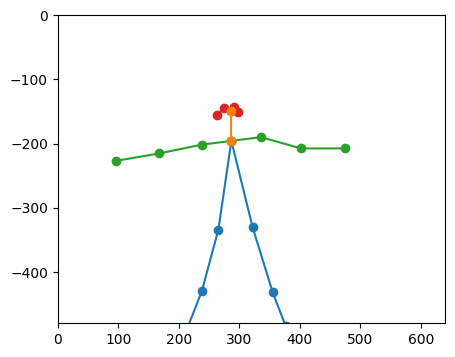

In [13]:
plot_all_frames('actions/action-0-group-2-rec-2.npy')


In [8]:
X = Xy[:, :-1]
y = Xy[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(random_state=42))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', LinearSVC(random_state=42))])

In [9]:
pipe.score(X_test, y_test)


0.8453583453583453

<Figure size 640x480 with 0 Axes>

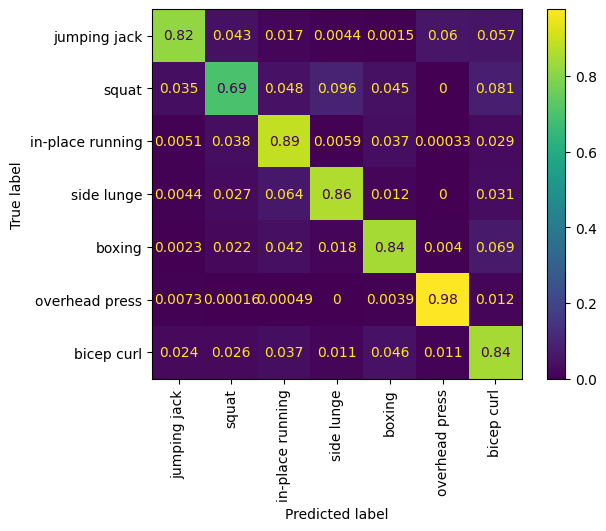

In [10]:
labels = [
    'jumping jack',
    'squat',
    'in-place running',
    'side lunge',
    'boxing',
    'overhead press',
    'bicep curl'
]

plt.figure()
dips = metrics.ConfusionMatrixDisplay.from_estimator(
    pipe,X_train,y_train,display_labels=labels,xticks_rotation='vertical', normalize='true')
plt.show()
